In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sqlite3

In [3]:
connection=sqlite3.connect(r'C:\Users\harsh\OneDrive\Desktop\Data Analytics\Zomato\zomato_rawdata.sqlite')

In [4]:
pd.read_sql_query("SELECT * FROM Users", connection).head()

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
df = pd.read_sql_query("SELECT * FROM Users", connection)

In [6]:
df.shape

(51717, 18)

In [7]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [9]:
df['rate'].replace(('NEW' , '-') , np.nan , inplace=True)

In [10]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [11]:
df['rate'] = df['rate'].apply(lambda x : float(x.split('/')[0]) if type(x)==str else x)

In [12]:
## Relation between online order and rating of the resturant

In [13]:
x=pd.crosstab(df['rate'],df['online_order'])

In [14]:
x

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22
2.4,36,34
2.5,38,63
2.6,83,177
2.7,141,166


<AxesSubplot:xlabel='rate'>

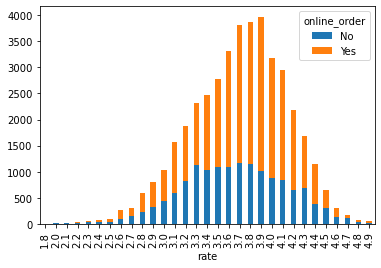

In [15]:
x.plot(kind='bar', stacked=True)

In [16]:
x.sum(axis=1).astype(float)

rate
1.8       5.0
2.0      11.0
2.1      24.0
2.2      26.0
2.3      51.0
2.4      70.0
2.5     101.0
2.6     260.0
2.7     307.0
2.8     600.0
2.9     802.0
3.0    1023.0
3.1    1561.0
3.2    1873.0
3.3    2310.0
3.4    2476.0
3.5    2784.0
3.6    3316.0
3.7    3821.0
3.8    3873.0
3.9    3972.0
4.0    3183.0
4.1    2948.0
4.2    2184.0
4.3    1693.0
4.4    1147.0
4.5     656.0
4.6     300.0
4.7     167.0
4.8      66.0
4.9      55.0
dtype: float64

In [17]:
normalised_df=x.div(x.sum(axis=1).astype(float), axis=0)

<AxesSubplot:xlabel='rate'>

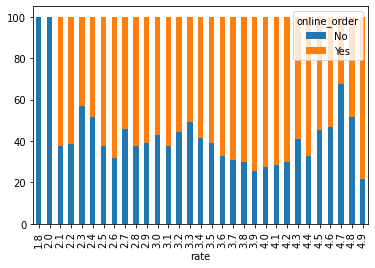

In [18]:
(normalised_df*100).plot(kind='bar', stacked=True)

In [19]:
## Text cleaning

In [20]:
df['rest_type'].isnull().sum()

227

In [21]:
data = df.dropna(subset=['rest_type'])

In [22]:
data['rest_type'].isnull().sum()

0

In [23]:
quicK_bites_df = data[data['rest_type'].str.contains('Quick Bites')]

In [24]:
quicK_bites_df

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
23,23,https://www.zomato.com/bangalore/my-tea-house-...,"224/Y, 4th Phase, 7th Block, 100 Feet Ring Roa...",My Tea House,Yes,No,3.6,62,080 65975430\r\n+91 7337733798,Banashankari,"Quick Bites, Cafe","Pasta, Iced Tea","Italian, Fast Food, Cafe, European",600,"[('Rated 4.0', ""RATED\n So, went here with fr...",[],Cafes,Banashankari
26,26,https://www.zomato.com/bangalore/coffee-tindi-...,"27th Cross Rd, Banashankari Stage II, Banashan...",Coffee Tindi,Yes,No,3.8,75,+91 9945758046,Banashankari,"Cafe, Quick Bites",None,"Cafe, South Indian",200,"[('Rated 5.0', 'RATED\n please provide some e...",[],Cafes,Banashankari
31,31,https://www.zomato.com/bangalore/foodiction-1-...,"2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...",Foodiction,Yes,No,2.8,506,+91 9916107070,Banashankari,Quick Bites,"Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...","North Indian, Fast Food, Chinese, Burger",500,"[('Rated 1.0', ""RATED\n Worst restaurant ever...",[],Delivery,Banashankari
34,34,https://www.zomato.com/bangalore/faasos-banash...,"80, BDA Complex, 2nd Stage, Banashankari, Bang...",Faasos,Yes,No,4.2,415,+91 7700020020,Banashankari,Quick Bites,"Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...","North Indian, Biryani, Fast Food",500,"[('Rated 3.0', 'RATED\n Not worth for the mon...","['Chole Kulcha Meal', 'Upvas Aloo Paratha With...",Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51641,51641,https://www.zomato.com/bangalore/andhra-spices...,"188, ITPL Main Road, Brookefields, Bangalore, ...",Andhra Spices,No,No,3.2,4,None,Brookefield,Quick Bites,None,"Andhra, Chinese, South Indian",None,"[('Rated 2.0', ""RATED\n Food is not upto the ...",[],Dine-out,Whitefield
51642,51642,https://www.zomato.com/bangalore/basaveshwara-...,"Nanjudeshwari complex, Oppsite Brookefield Mal...",Basaveshwara Khanavali,No,No,NaN,0,+91 9740912864\n+91 7353747430,Brookefield,Quick Bites,None,South Indian,200,[],[],Dine-out,Whitefield
51643,51643,https://www.zomato.com/bangalore/new-ambur-bir...,"AECS Layout, ITPL Main Road, Brookefield, Bang...",New Ambur Biryani,No,No,NaN,0,+91 9443087893,Brookefield,Quick Bites,None,"Biryani, Kebab",300,[],[],Dine-out,Whitefield
51644,51644,https://www.zomato.com/bangalore/punjabi-thadk...,"7/3, ASK Tower, Kundanahalli Gate, Next to Bat...",Punjabi Thadka,No,No,NaN,0,+91 7338330336\n+91 9591568221,Brookefield,Quick Bites,None,North Indian,400,[],[],Dine-out,Whitefield


In [25]:
quicK_bites_df.columns


Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [26]:
quicK_bites_df['reviews_list']

3        [('Rated 4.0', "RATED\n  Great food and proper...
23       [('Rated 4.0', "RATED\n  So, went here with fr...
26       [('Rated 5.0', 'RATED\n  please provide some e...
31       [('Rated 1.0', "RATED\n  Worst restaurant ever...
34       [('Rated 3.0', 'RATED\n  Not worth for the mon...
                               ...                        
51641    [('Rated 2.0', "RATED\n  Food is not upto the ...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [('Rated 5.0', "RATED\n  I was randomly lookin...
Name: reviews_list, Length: 20639, dtype: object

In [27]:
quicK_bites_df['reviews_list'].apply(lambda x:x.lower())

3        [('rated 4.0', "rated\n  great food and proper...
23       [('rated 4.0', "rated\n  so, went here with fr...
26       [('rated 5.0', 'rated\n  please provide some e...
31       [('rated 1.0', "rated\n  worst restaurant ever...
34       [('rated 3.0', 'rated\n  not worth for the mon...
                               ...                        
51641    [('rated 2.0', "rated\n  food is not upto the ...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [('rated 5.0', "rated\n  i was randomly lookin...
Name: reviews_list, Length: 20639, dtype: object

In [28]:
from nltk.corpus import RegexpTokenizer

In [29]:
tokenizer = RegexpTokenizer("[a-zA-Z]+")

In [30]:
tokenizer.tokenize(quicK_bites_df['reviews_list'][3])

['Rated',
 'RATED',
 'n',
 'Great',
 'food',
 'and',
 'proper',
 'Karnataka',
 'style',
 'full',
 'meals',
 'Been',
 'there',
 'twice',
 'and',
 'was',
 'fully',
 'satisfied',
 'Will',
 'give',
 'stars',
 'if',
 'it',
 's',
 'well',
 'managed',
 'Rated',
 'RATED',
 'n',
 'Reached',
 'the',
 'place',
 'at',
 'pm',
 'on',
 'Saturday',
 'Half',
 'of',
 'the',
 'items',
 'on',
 'the',
 'menu',
 'were',
 'over',
 'What',
 'was',
 'annoying',
 'was',
 'is',
 'the',
 'food',
 'was',
 'cold',
 'The',
 'taste',
 'was',
 'also',
 'very',
 'average',
 'Only',
 'dosa',
 'and',
 'holige',
 'were',
 'good',
 'There',
 'were',
 'very',
 'few',
 'people',
 'in',
 'the',
 'restaurant',
 'and',
 'the',
 'service',
 'was',
 'still',
 'very',
 'slow',
 'The',
 'waiters',
 'were',
 'all',
 'standing',
 'in',
 'one',
 'corner',
 'and',
 'talking',
 'Had',
 'to',
 'call',
 'them',
 'repeatedly',
 'Rated',
 'RATED',
 'n',
 'Had',
 'been',
 'here',
 'good',
 'food',
 'served',
 'and',
 'tasty',
 'good',
 'plac

In [31]:
sample = data[0:10000]

In [32]:
reviews_tokens = sample['reviews_list'].apply(tokenizer.tokenize)

In [33]:
## removal of stopwords

In [34]:
import nltk
from nltk.corpus import stopwords

In [35]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [36]:
stop = stopwords.words('english')

In [37]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [38]:
stop.extend(['rated' , "n" , "nan" , "x" , "RATED" , "Rated"])

In [39]:
reviews_tokens

0        [Rated, RATED, n, A, beautiful, place, to, din...
1        [Rated, RATED, n, Had, been, here, for, dinner...
2        [Rated, RATED, n, Ambience, is, not, that, goo...
3        [Rated, RATED, n, Great, food, and, proper, Ka...
4        [Rated, RATED, n, Very, good, restaurant, in, ...
                               ...                        
10046    [Rated, RATED, n, A, simplistic, joy, for, loc...
10047                              [Rated, RATED, n, Good]
10048    [Rated, RATED, n, Vry, gud, taste, and, someth...
10049                                                   []
10050                                                   []
Name: reviews_list, Length: 10000, dtype: object

In [40]:
rev3=reviews_tokens[3]

In [41]:
print([token for token in rev3 if token not in stop])

['Great', 'food', 'proper', 'Karnataka', 'style', 'full', 'meals', 'Been', 'twice', 'fully', 'satisfied', 'Will', 'give', 'stars', 'well', 'managed', 'Reached', 'place', 'pm', 'Saturday', 'Half', 'items', 'menu', 'What', 'annoying', 'food', 'cold', 'The', 'taste', 'also', 'average', 'Only', 'dosa', 'holige', 'good', 'There', 'people', 'restaurant', 'service', 'still', 'slow', 'The', 'waiters', 'standing', 'one', 'corner', 'talking', 'Had', 'call', 'repeatedly', 'Had', 'good', 'food', 'served', 'tasty', 'good', 'place', 'go', 'freinds', 'family', 'first', 'get', 'served', 'well', 'food', 'One', 'good', 'hotel', 'price', 'How', 'Udupi', 'restaurant', 'dirty', 'floor', 'walls', 'waiters', 'stained', 'food', 'Why', 'cant', 'clean', 'The', 'floor', 'even', 'decorative', 'colour', 'paper', 'every', 'lot', 'food', 'Now', 'coming', 'taste', 'food', 'pretty', 'decent', 'chargw', 'What', 'upset', 'us', 'menu', 'says', 'serve', 'thambuli', 'two', 'variety', 'rice', 'etc', 'still', 'charged', 'us'

In [42]:
reviews_tokens_clean = reviews_tokens.apply(lambda each_review : [token for token in each_review if token not in stop])

In [43]:
reviews_tokens_clean

0        [A, beautiful, place, dine, The, interiors, ta...
1        [Had, dinner, family, Turned, good, choose, su...
2        [Ambience, good, enough, pocket, friendly, caf...
3        [Great, food, proper, Karnataka, style, full, ...
4        [Very, good, restaurant, neighbourhood, Buffet...
                               ...                        
10046    [A, simplistic, joy, local, biryani, lovers, n...
10047                                               [Good]
10048    [Vry, gud, taste, something, different, must, ...
10049                                                   []
10050                                                   []
Name: reviews_list, Length: 10000, dtype: object

In [44]:
total_reviews_2D = list(reviews_tokens_clean)

In [45]:
total_reviews_1D = []

for review in total_reviews_2D:
    for word in review:
        total_reviews_1D.append(word)

In [46]:
total_reviews_1D

['A',
 'beautiful',
 'place',
 'dine',
 'The',
 'interiors',
 'take',
 'back',
 'Mughal',
 'era',
 'The',
 'lightings',
 'perfect',
 'We',
 'went',
 'occasion',
 'Christmas',
 'limited',
 'items',
 'available',
 'But',
 'taste',
 'service',
 'compromised',
 'The',
 'complaint',
 'breads',
 'could',
 'better',
 'Would',
 'surely',
 'like',
 'come',
 'I',
 'dinner',
 'family',
 'weekday',
 'The',
 'restaurant',
 'completely',
 'empty',
 'Ambience',
 'good',
 'good',
 'old',
 'hindi',
 'music',
 'Seating',
 'arrangement',
 'good',
 'We',
 'ordered',
 'masala',
 'papad',
 'panner',
 'baby',
 'corn',
 'starters',
 'lemon',
 'corrionder',
 'soup',
 'butter',
 'roti',
 'olive',
 'chilli',
 'paratha',
 'Food',
 'fresh',
 'good',
 'service',
 'good',
 'Good',
 'family',
 'hangout',
 'nCheers',
 'Its',
 'restaurant',
 'near',
 'Banashankari',
 'BDA',
 'Me',
 'along',
 'office',
 'friends',
 'visited',
 'buffet',
 'unfortunately',
 'provide',
 'veg',
 'buffet',
 'On',
 'inquiring',
 'said',
 'pla

In [47]:
from collections import Counter

In [48]:
Counter(total_reviews_1D).most_common(20)

[('place', 139173),
 ('I', 137965),
 ('good', 134232),
 ('food', 126195),
 ('The', 97479),
 ('chicken', 46887),
 ('service', 41216),
 ('taste', 40063),
 ('ordered', 39651),
 ('great', 34402),
 ('really', 33942),
 ('time', 33052),
 ('try', 32415),
 ('one', 32079),
 ('ambience', 31703),
 ('like', 30679),
 ('also', 30647),
 ('It', 30487),
 ('visit', 27355),
 ('restaurant', 26421)]

In [49]:
from nltk import FreqDist

In [50]:
fd = FreqDist()

In [51]:
for word in total_reviews_1D:
    fd[word] = fd[word] + 1

In [52]:
fd.most_common(20)

[('place', 139173),
 ('I', 137965),
 ('good', 134232),
 ('food', 126195),
 ('The', 97479),
 ('chicken', 46887),
 ('service', 41216),
 ('taste', 40063),
 ('ordered', 39651),
 ('great', 34402),
 ('really', 33942),
 ('time', 33052),
 ('try', 32415),
 ('one', 32079),
 ('ambience', 31703),
 ('like', 30679),
 ('also', 30647),
 ('It', 30487),
 ('visit', 27355),
 ('restaurant', 26421)]

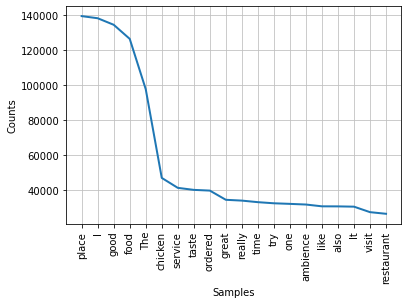

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [53]:
fd.plot(20)

In [54]:
from nltk import FreqDist , bigrams , trigrams

In [55]:
bi_grams = bigrams(total_reviews_1D)

In [56]:
fd_bigrams = FreqDist()

for bigram in bi_grams:
    fd_bigrams[bigram] = fd_bigrams[bigram] + 1

In [57]:
fd_bigrams.most_common(20)

[(('The', 'food'), 10497),
 (('I', 'ordered'), 10159),
 (('really', 'good'), 9575),
 (('This', 'place'), 8208),
 (('must', 'try'), 7824),
 (('I', 'would'), 7353),
 (('We', 'ordered'), 7223),
 (('visit', 'place'), 6897),
 (('food', 'good'), 6823),
 (('good', 'food'), 6482),
 (('The', 'place'), 6158),
 (('main', 'course'), 5544),
 (('non', 'veg'), 5364),
 (('good', 'place'), 5339),
 (('ice', 'cream'), 5287),
 (('also', 'good'), 5083),
 (('The', 'ambience'), 4798),
 (('I', 'tried'), 4523),
 (('good', 'I'), 4139),
 (('good', 'The'), 4078)]

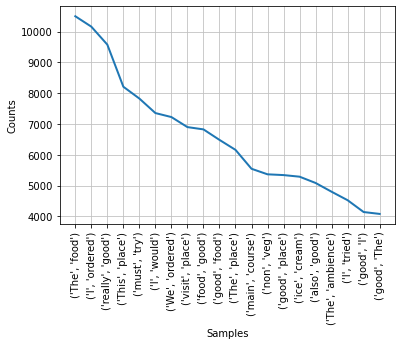

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [58]:
fd_bigrams.plot(20)

In [59]:
fd_bigrams.most_common(100)

[(('The', 'food'), 10497),
 (('I', 'ordered'), 10159),
 (('really', 'good'), 9575),
 (('This', 'place'), 8208),
 (('must', 'try'), 7824),
 (('I', 'would'), 7353),
 (('We', 'ordered'), 7223),
 (('visit', 'place'), 6897),
 (('food', 'good'), 6823),
 (('good', 'food'), 6482),
 (('The', 'place'), 6158),
 (('main', 'course'), 5544),
 (('non', 'veg'), 5364),
 (('good', 'place'), 5339),
 (('ice', 'cream'), 5287),
 (('also', 'good'), 5083),
 (('The', 'ambience'), 4798),
 (('I', 'tried'), 4523),
 (('good', 'I'), 4139),
 (('good', 'The'), 4078),
 (('food', 'I'), 3998),
 (('place', 'I'), 3896),
 (('The', 'service'), 3830),
 (('one', 'best'), 3711),
 (('must', 'visit'), 3658),
 (('I', 'love'), 3529),
 (('quality', 'food'), 3510),
 (('nWe', 'ordered'), 3490),
 (('time', 'I'), 3398),
 (('nice', 'place'), 3290),
 (('The', 'staff'), 3286),
 (('taste', 'good'), 3275),
 (('pretty', 'good'), 3270),
 (('fried', 'rice'), 3127),
 (('pocket', 'friendly'), 3097),
 (('place', 'good'), 3083),
 (('I', 'loved'), 

In [60]:
tri_grams = trigrams(total_reviews_1D)

In [61]:

fd_trigrams = FreqDist()

for trigram in tri_grams:
    fd_trigrams[trigram] = fd_trigrams[trigram] + 1

In [62]:
fd_trigrams.most_common(50)

[(('veg', 'non', 'veg'), 1525),
 (('must', 'visit', 'place'), 1487),
 (('The', 'food', 'good'), 1339),
 (('place', 'hangout', 'friends'), 1165),
 (('I', 'must', 'say'), 1131),
 (('I', 'would', 'recommend'), 1059),
 (('I', 'visited', 'place'), 1054),
 (('I', 'would', 'say'), 979),
 (('place', 'hang', 'friends'), 967),
 (('food', 'really', 'good'), 886),
 (('nFood', 'nAmbience', 'nService'), 845),
 (('A', 'must', 'visit'), 768),
 (('The', 'ambience', 'good'), 751),
 (('A', 'good', 'place'), 737),
 (('North', 'Indian', 'food'), 675),
 (('I', 'would', 'like'), 619),
 (('nFood', 'nService', 'nAmbience'), 607),
 (('A', 'must', 'try'), 603),
 (('I', 'really', 'liked'), 595),
 (('I', 'ordered', 'chicken'), 582),
 (('first', 'time', 'I'), 570),
 (('The', 'staff', 'friendly'), 561),
 (('The', 'best', 'part'), 561),
 (('The', 'food', 'really'), 559),
 (('Overall', 'good', 'experience'), 558),
 (('I', 'love', 'place'), 554),
 (('paneer', 'butter', 'masala'), 554),
 (('really', 'good', 'The'), 552)

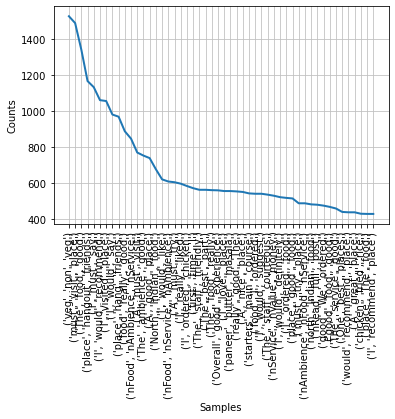

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [63]:
fd_trigrams.plot(50)

In [64]:
## Geographical Analysis

In [65]:
%pip install geocoder

Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "c:\Users\harsh\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "c:\Users\harsh\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "c:\Users\harsh\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "c:\Users\harsh\anaconda3\lib\http\client.py", line 463, in read
    n = self.readinto(b)
  File "c:\Users\harsh\anaconda3\lib\http\client.py", line 507, in readinto
    n = self.fp.readinto(b)
  File "c:\Users\harsh\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "c:\Users\harsh\anaconda3\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "c:\Users\harsh\anaconda3\lib\ssl.py", line 1099, in read
    return self._sslobj.read(len, buffer)
soc

In [66]:
%pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [67]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', None, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan

In [68]:
df['location']=df['location']+", Bangalore, Karnataka, India"

In [69]:
df['location']

0                Banashankari, Bangalore, Karnataka, India
1                Banashankari, Bangalore, Karnataka, India
2                Banashankari, Bangalore, Karnataka, India
3                Banashankari, Bangalore, Karnataka, India
4                Basavanagudi, Bangalore, Karnataka, India
                               ...                        
51712              Whitefield, Bangalore, Karnataka, India
51713              Whitefield, Bangalore, Karnataka, India
51714              Whitefield, Bangalore, Karnataka, India
51715    ITPL Main Road, Whitefield, Bangalore, Karnata...
51716    ITPL Main Road, Whitefield, Bangalore, Karnata...
Name: location, Length: 51717, dtype: object

In [70]:
df_copy=df.copy()

In [71]:
df_copy.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                           10052
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [72]:
df_copy=df_copy.dropna(subset=['location'])

In [73]:
df_copy.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                           10031
votes                              0
phone                           1187
location                           0
rest_type                        206
dish_liked                     28057
cuisines                          24
approx_cost(for two people)      325
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [74]:
locations = pd.DataFrame(df_copy['location'].unique())

In [75]:
locations

,0
0,"Banashankari, Bangalore, Karnataka, India"
1,"Basavanagudi, Bangalore, Karnataka, India"
2,"Mysore Road, Bangalore, Karnataka, India"
3,"Jayanagar, Bangalore, Karnataka, India"
4,"Kumaraswamy Layout, Bangalore, Karnataka, India"
...,...
88,"West Bangalore, Bangalore, Karnataka, India"
89,"Magadi Road, Bangalore, Karnataka, India"
90,"Yelahanka, Bangalore, Karnataka, India"
91,"Sahakara Nagar, Bangalore, Karnataka, India"


In [76]:
locations.columns = ['name']

In [77]:
locations

,name
0,"Banashankari, Bangalore, Karnataka, India"
1,"Basavanagudi, Bangalore, Karnataka, India"
2,"Mysore Road, Bangalore, Karnataka, India"
3,"Jayanagar, Bangalore, Karnataka, India"
4,"Kumaraswamy Layout, Bangalore, Karnataka, India"
...,...
88,"West Bangalore, Bangalore, Karnataka, India"
89,"Magadi Road, Bangalore, Karnataka, India"
90,"Yelahanka, Bangalore, Karnataka, India"
91,"Sahakara Nagar, Bangalore, Karnataka, India"


In [78]:
from geopy.geocoders import Nominatim

In [79]:
geolocator = Nominatim(user_agent="app" , timeout=None)

In [80]:
lat=[]
lon=[]

for location in locations['name']:
    location = geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)
    

In [81]:
locations['latitude'] = lat
locations['longitude'] = lon

In [82]:
locations

,name,latitude,longitude
0,"Banashankari, Bangalore, Karnataka, India",12.939333,77.553982
1,"Basavanagudi, Bangalore, Karnataka, India",12.941726,77.575502
2,"Mysore Road, Bangalore, Karnataka, India",12.951766,77.540063
3,"Jayanagar, Bangalore, Karnataka, India",12.941849,77.586898
4,"Kumaraswamy Layout, Bangalore, Karnataka, India",12.906768,77.559502
...,...,...,...
88,"West Bangalore, Bangalore, Karnataka, India",13.009476,77.553089
89,"Magadi Road, Bangalore, Karnataka, India",12.975653,77.555355
90,"Yelahanka, Bangalore, Karnataka, India",13.100698,77.596345
91,"Sahakara Nagar, Bangalore, Karnataka, India",13.062147,77.580061


In [83]:
locations[locations['latitude'].isna()]

,name,latitude,longitude
79,"Rammurthy Nagar, Bangalore, Karnataka, India",NaN,NaN
85,"Sadashiv Nagar, Bangalore, Karnataka, India",NaN,NaN


In [84]:
locations['latitude'][79] = 13.0163
locations['longitude'][79] = 77.6785

C:\Users\harsh\AppData\Local\Temp\ipykernel_18988\2305678588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locations['latitude'][79] = 13.0163
C:\Users\harsh\AppData\Local\Temp\ipykernel_18988\2305678588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locations['longitude'][79] = 77.6785


In [85]:
locations['latitude'][85] = 13.0068
locations['longitude'][85] = 77.5813

C:\Users\harsh\AppData\Local\Temp\ipykernel_18988\2928626199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locations['latitude'][85] = 13.0068
C:\Users\harsh\AppData\Local\Temp\ipykernel_18988\2928626199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locations['longitude'][85] = 77.5813


In [86]:
locations[locations['latitude'].isna()]

,name,latitude,longitude


In [87]:
df['cuisines'].isnull().sum()

45

In [88]:
df=df.dropna(subset=['cuisines'])

In [89]:
df['cuisines'].isnull().sum()

0

In [90]:
north_india = df[df['cuisines'].str.contains('North Indian')]

In [91]:
north_india.shape

(21085, 18)

In [92]:
north_india_rest_count = north_india['location'].value_counts().reset_index().rename(columns={ "location":"name"})

In [93]:
north_india_rest_count

,index,name
0,"BTM, Bangalore, Karnataka, India",2469
1,"HSR, Bangalore, Karnataka, India",1123
2,"Whitefield, Bangalore, Karnataka, India",1059
3,"Marathahalli, Bangalore, Karnataka, India",1038
4,"JP Nagar, Bangalore, Karnataka, India",958
...,...,...
85,"Hebbal, Bangalore, Karnataka, India",4
86,"Jakkur, Bangalore, Karnataka, India",3
87,"Central Bangalore, Bangalore, Karnataka, India",2
88,"West Bangalore, Bangalore, Karnataka, India",1


In [94]:
locations

,name,latitude,longitude
0,"Banashankari, Bangalore, Karnataka, India",12.939333,77.553982
1,"Basavanagudi, Bangalore, Karnataka, India",12.941726,77.575502
2,"Mysore Road, Bangalore, Karnataka, India",12.951766,77.540063
3,"Jayanagar, Bangalore, Karnataka, India",12.941849,77.586898
4,"Kumaraswamy Layout, Bangalore, Karnataka, India",12.906768,77.559502
...,...,...,...
88,"West Bangalore, Bangalore, Karnataka, India",13.009476,77.553089
89,"Magadi Road, Bangalore, Karnataka, India",12.975653,77.555355
90,"Yelahanka, Bangalore, Karnataka, India",13.100698,77.596345
91,"Sahakara Nagar, Bangalore, Karnataka, India",13.062147,77.580061


In [95]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [96]:
north_india_rest_count['longitude']=locations['longitude']
north_india_rest_count['latitude']=locations['latitude']

In [97]:
north_india_rest_count

,index,name,longitude,latitude
0,"BTM, Bangalore, Karnataka, India",2469,77.553982,12.939333
1,"HSR, Bangalore, Karnataka, India",1123,77.575502,12.941726
2,"Whitefield, Bangalore, Karnataka, India",1059,77.540063,12.951766
3,"Marathahalli, Bangalore, Karnataka, India",1038,77.586898,12.941849
4,"JP Nagar, Bangalore, Karnataka, India",958,77.559502,12.906768
...,...,...,...,...
85,"Hebbal, Bangalore, Karnataka, India",4,77.581300,13.006800
86,"Jakkur, Bangalore, Karnataka, India",3,77.544892,12.991180
87,"Central Bangalore, Bangalore, Karnataka, India",2,77.552921,13.023830
88,"West Bangalore, Bangalore, Karnataka, India",1,77.553089,13.009476


In [98]:
heatmap_df=north_india_rest_count.copy()

In [99]:
%pip install folium
import folium


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.
jupyter-server 1.13.5 requires pywinpty<2; os_name == "nt", but you have pywinpty 2.0.2 which is incompatible.


  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
Note: you may need to restart the kernel to use updated packages.


In [100]:
basemap = folium.Map()

In [101]:
basemap

In [102]:
heatmap_df

,index,name,longitude,latitude
0,"BTM, Bangalore, Karnataka, India",2469,77.553982,12.939333
1,"HSR, Bangalore, Karnataka, India",1123,77.575502,12.941726
2,"Whitefield, Bangalore, Karnataka, India",1059,77.540063,12.951766
3,"Marathahalli, Bangalore, Karnataka, India",1038,77.586898,12.941849
4,"JP Nagar, Bangalore, Karnataka, India",958,77.559502,12.906768
...,...,...,...,...
85,"Hebbal, Bangalore, Karnataka, India",4,77.581300,13.006800
86,"Jakkur, Bangalore, Karnataka, India",3,77.544892,12.991180
87,"Central Bangalore, Bangalore, Karnataka, India",2,77.552921,13.023830
88,"West Bangalore, Bangalore, Karnataka, India",1,77.553089,13.009476


In [103]:
from folium.plugins import HeatMap

In [104]:
da=heatmap_df[['latitude', 'longitude' , 'count']]

KeyError: "['count'] not in index"

In [ ]:
da.isnull().sum()

latitude     0
longitude    0
count        0
dtype: int64

In [ ]:
HeatMap(da).add_to(basemap)

In [ ]:
basemap

In [ ]:
def get_heatmap(cuisine):
    cuisine_df = df[df['cuisines'].str.contains(cuisine)]
    cuisine_rest_count = cuisine_df['location'].value_counts().reset_index().rename(columns={ "location":"name"})
    cuisine_rest_count['longitude']=locations['longitude']
    cuisine_rest_count['latitude']=locations['latitude']
    print(cuisine_rest_count.head())

    basemap = folium.Map()
    temp=heatmap_df[['latitude', 'longitude' , 'count']]
    HeatMap(temp).add_to(basemap)
    return basemap

In [ ]:
get_heatmap('South Indian')

                                      name  count  longitude   latitude
0         BTM, Bangalore, Karnataka, India    815  77.547927  12.931558
1    JP Nagar, Bangalore, Karnataka, India    437  77.575502  12.941726
2         HSR, Bangalore, Karnataka, India    436  77.530090  12.946662
3   Jayanagar, Bangalore, Karnataka, India    416  77.582423  12.929273
4  Whitefield, Bangalore, Karnataka, India    308  77.559502  12.906768
